In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
df=pd.read_csv('car_price.csv')
df

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats
...,...,...,...,...,...,...,...,...,...,...
5507,5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats
5508,5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats
5509,5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats
5510,5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats


In [192]:
df.shape

(5512, 10)

In [193]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


In [195]:
df.columns

Index(['Unnamed: 0', 'car_name', 'car_prices_in_rupee', 'kms_driven',
       'fuel_type', 'transmission', 'ownership', 'manufacture', 'engine',
       'Seats'],
      dtype='object')

In [196]:
df.dtypes

Unnamed: 0              int64
car_name               object
car_prices_in_rupee    object
kms_driven             object
fuel_type              object
transmission           object
ownership              object
manufacture             int64
engine                 object
Seats                  object
dtype: object

In [197]:
df.isnull().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [198]:
# splitting car price as price and multiply
df[['price', 'multiply']] = df['car_prices_in_rupee'].str.split(' ', n=1, expand=True)
df.drop('car_prices_in_rupee', axis=1, inplace=True)

In [199]:
# converting multiply column into numerical value
df['multiply']=df['multiply'].str.replace('Lakh','100000')
df['multiply']=df['multiply'].str.replace('Crore','10000000')
df['multiply'] = pd.to_numeric(df['multiply'])

In [200]:
# getting price in actual numbers
df['price']=df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'])
df['price'] = df['price'] * df['multiply']

In [201]:
# remove the multiply column
df = df.drop(columns=["multiply"], axis=1)

In [202]:
# rename the column names
df.rename(columns={'manufacture': 'year'}, inplace=True)

In [203]:
df.head()

,Unnamed: 0,car_name,kms_driven,fuel_type,transmission,ownership,year,engine,Seats,price
0,0,Jeep Compass 2.0 Longitude Option BSIV,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,1003000.0
1,1,Renault Duster RXZ Turbo CVT,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,1283000.0
2,2,Toyota Camry 2.5 G,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,1640000.0
3,3,Honda Jazz VX CVT,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,777000.0
4,4,Volkswagen Polo 1.2 MPI Highline,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,515000.0


In [204]:
# renaming car_name as model
# creating a column as manufacturer
# only model name
df.rename(columns={'car_name': 'model'}, inplace=True)
df['manufacturer'] = df['model'].map(lambda x: str(x).strip().split(" ")[0])
df['model'] = df['model'].map(lambda x: str(x).strip().split(" ")[1])

In [205]:
# changing kms driven to numeric
df['kms_driven'] = df['kms_driven'].map(lambda x: x.rstrip(' kms'))
df['kms_driven'] = df['kms_driven'].map(lambda x: x.replace(',', ''))
df['kms_driven'] = pd.to_numeric(df['kms_driven'])

In [206]:
# changing engine into numeric
df['engine'] = df['engine'].map(lambda x: x.rstrip(' cc'))
df['engine'] = pd.to_numeric(df['engine'])

In [207]:
# removing seats abbrevation
df['Seats'] = df['Seats'].map(lambda x: x.rstrip(' Seats'))

In [208]:
df['manufacturer'].value_counts()

manufacturer
Maruti           1389
Hyundai          1023
Honda             498
Mahindra          315
Mercedes-Benz     283
Tata              269
Toyota            263
BMW               172
Renault           170
Ford              168
Audi              166
Volkswagen        159
Skoda             113
Chevrolet          82
Nissan             63
MG                 62
Kia                61
Land               50
Jeep               49
Volvo              31
Jaguar             30
Datsun             25
Fiat               17
Mini               14
Porsche            10
Lexus              10
Mitsubishi          8
Maserati            5
Isuzu               4
Force               1
Premier             1
Bentley             1
Name: count, dtype: int64

In [209]:
df = df.drop(columns=["Unnamed: 0"], axis=1)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         5512 non-null   object 
 1   kms_driven    5512 non-null   int64  
 2   fuel_type     5512 non-null   object 
 3   transmission  5512 non-null   object 
 4   ownership     5512 non-null   object 
 5   year          5512 non-null   int64  
 6   engine        5512 non-null   int64  
 7   Seats         5512 non-null   object 
 8   price         5389 non-null   float64
 9   manufacturer  5512 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 430.8+ KB


In [211]:
df.head()

,model,kms_driven,fuel_type,transmission,ownership,year,engine,Seats,price,manufacturer
0,Compass,86226,Diesel,Manual,1st Owner,2017,1956,5,1003000.0,Jeep
1,Duster,13248,Petrol,Automatic,1st Owner,2021,1330,5,1283000.0,Renault
2,Camry,60343,Petrol,Automatic,1st Owner,2016,2494,5,1640000.0,Toyota
3,Jazz,26696,Petrol,Automatic,1st Owner,2018,1199,5,777000.0,Honda
4,Polo,69414,Petrol,Manual,1st Owner,2016,1199,5,515000.0,Volkswagen


In [212]:
# rearrange the data frame
df = df.iloc[:,[8,0,5,1,6,2,3,7,4,9]]

In [213]:
df.head()

,price,model,year,kms_driven,engine,fuel_type,transmission,Seats,ownership,manufacturer
0,1003000.0,Compass,2017,86226,1956,Diesel,Manual,5,1st Owner,Jeep
1,1283000.0,Duster,2021,13248,1330,Petrol,Automatic,5,1st Owner,Renault
2,1640000.0,Camry,2016,60343,2494,Petrol,Automatic,5,1st Owner,Toyota
3,777000.0,Jazz,2018,26696,1199,Petrol,Automatic,5,1st Owner,Honda
4,515000.0,Polo,2016,69414,1199,Petrol,Manual,5,1st Owner,Volkswagen


In [214]:
# replace nan with zero and inf with finite numbers because input is too large for training
df['price'] = np.nan_to_num(df['price'])

In [215]:
df.head()

,price,model,year,kms_driven,engine,fuel_type,transmission,Seats,ownership,manufacturer
0,1003000.0,Compass,2017,86226,1956,Diesel,Manual,5,1st Owner,Jeep
1,1283000.0,Duster,2021,13248,1330,Petrol,Automatic,5,1st Owner,Renault
2,1640000.0,Camry,2016,60343,2494,Petrol,Automatic,5,1st Owner,Toyota
3,777000.0,Jazz,2018,26696,1199,Petrol,Automatic,5,1st Owner,Honda
4,515000.0,Polo,2016,69414,1199,Petrol,Manual,5,1st Owner,Volkswagen


<Axes: ylabel='year'>

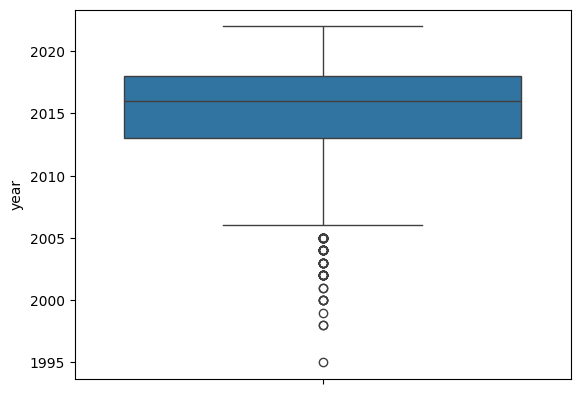

In [216]:
sns.boxplot(df['year'])

<Axes: ylabel='year'>

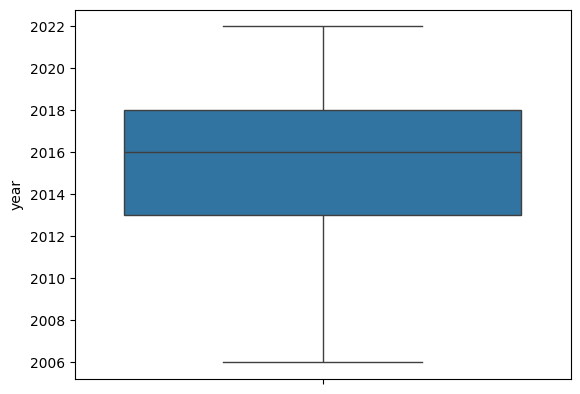

In [217]:
Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df1= df[(df['year'] >= lower_bound) & (df['year'] <= upper_bound)]

sns.boxplot(df1['year'])

<Axes: ylabel='kms_driven'>

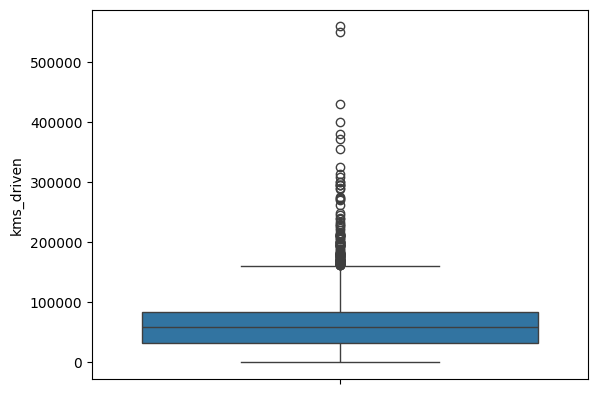

In [218]:
sns.boxplot(df['kms_driven'])

<Axes: ylabel='kms_driven'>

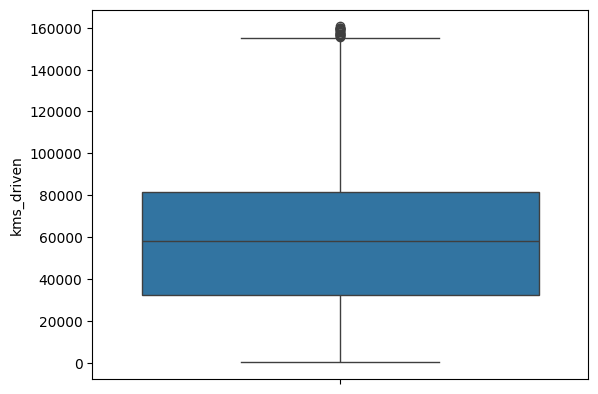

In [219]:
Q1 = df['kms_driven'].quantile(0.25)
Q3 = df['kms_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df1= df[(df['kms_driven'] >= lower_bound) & (df['kms_driven'] <= upper_bound)]

sns.boxplot(df1['kms_driven'])

<Axes: ylabel='engine'>

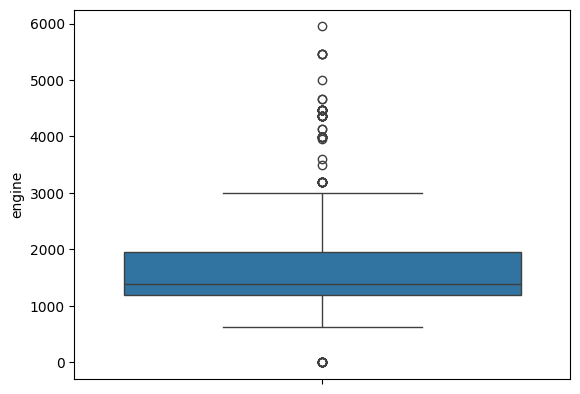

In [220]:
sns.boxplot(df['engine'])

<Axes: ylabel='engine'>

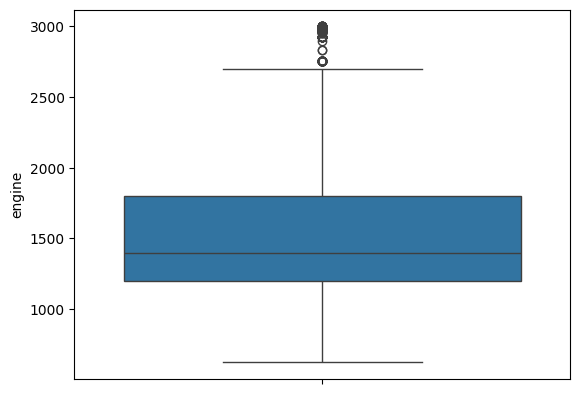

In [221]:
Q1 = df['engine'].quantile(0.25)
Q3 = df['engine'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df1= df[(df['engine'] >= lower_bound) & (df['engine'] <= upper_bound)]
sns.boxplot(df1['engine'])


In [222]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate through each column and apply label encoding
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is categorical
        df[col] = label_encoder.fit_transform(df[col])

print(df)

          price  model  year  kms_driven  engine  fuel_type  transmission  \
0     1003000.0     47  2017       86226    1956          1             1   
1     1283000.0     54  2021       13248    1330          4             0   
2     1640000.0     39  2016       60343    2494          4             0   
3      777000.0     99  2018       26696    1199          4             0   
4      515000.0    138  2016       69414    1199          4             1   
...         ...    ...   ...         ...     ...        ...           ...   
5507  2890000.0    204  2018       45000    2995          1             0   
5508  6490000.0    113  2015       29000    1968          4             0   
5509  1375000.0    213  2013       90000    2755          1             0   
5510  2990000.0      4  2015       79000    2967          1             0   
5511  3190000.0      2  2017       42000    1991          1             0   

      Seats  ownership  manufacturer  
0         2          1            12

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         5512 non-null   float64
 1   model         5512 non-null   int64  
 2   year          5512 non-null   int64  
 3   kms_driven    5512 non-null   int64  
 4   engine        5512 non-null   int64  
 5   fuel_type     5512 non-null   int64  
 6   transmission  5512 non-null   int64  
 7   Seats         5512 non-null   int64  
 8   ownership     5512 non-null   int64  
 9   manufacturer  5512 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 430.8 KB


In [224]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(df)

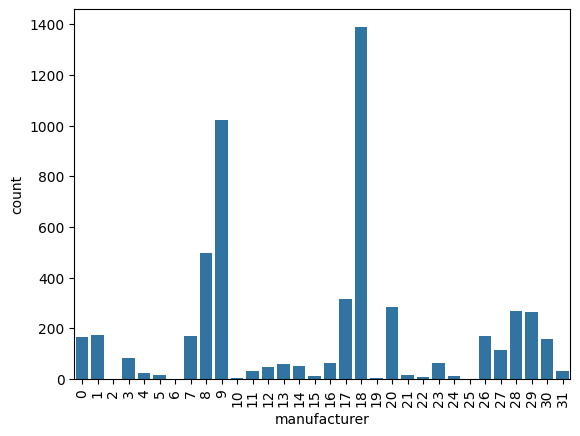

In [225]:
#Data Visualization
# car count based on manufacturer
ax = sns.countplot(data=df, x=df['manufacturer'])
ax.tick_params(axis='x', rotation=90)

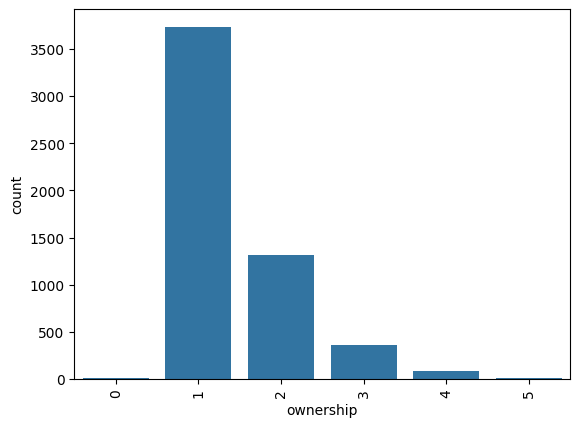

In [226]:
# car count based on ownership
ax = sns.countplot(data=df, x=df['ownership'])
ax.tick_params(axis='x', rotation=90)

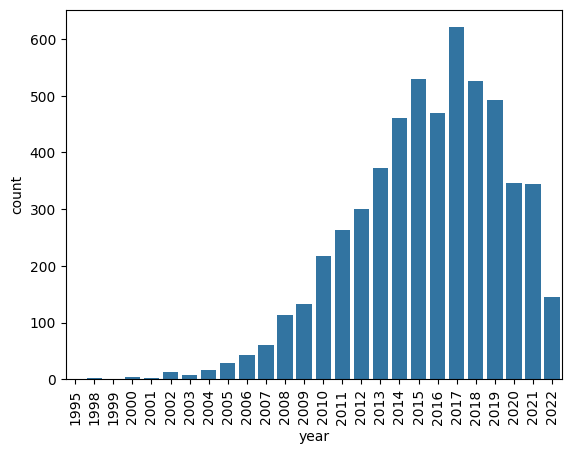

In [227]:
# car count based on year
ax = sns.countplot(data=df, x=df['year'])
ax.tick_params(axis='x', rotation=90)

In [228]:
df['fuel_type'].value_counts()

fuel_type
4    2967
1    2423
0      80
3      28
2      14
Name: count, dtype: int64

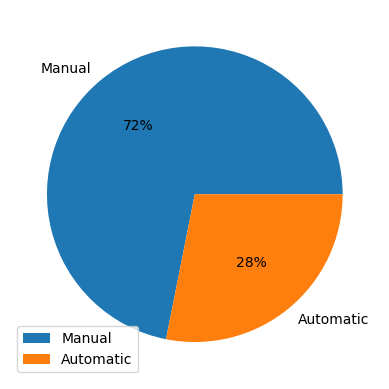

In [229]:
# distribution of cars by transmission
labels = ['Manual', 'Automatic']
plt.pie(df['transmission'].value_counts(), labels = labels, autopct='%.0f%%')
plt.legend()
plt.show()

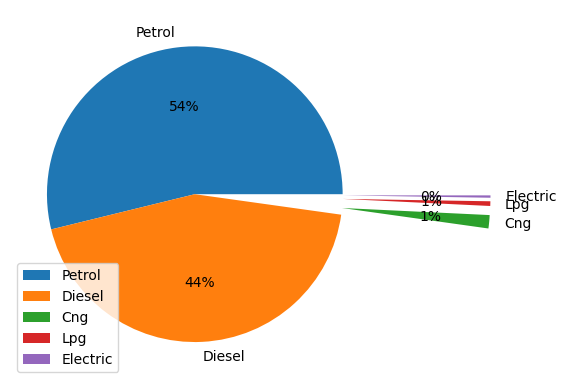

In [230]:
# distribution of cars by fuel type
labels = ['Petrol', 'Diesel', 'Cng', 'Lpg', 'Electric']
plt.pie(df['fuel_type'].value_counts(), labels = labels, explode=[0, 0, 1, 1, 1], autopct='%.0f%%')
plt.legend()
plt.show()

<Axes: title={'center': 'Average car price by Year'}, xlabel='year'>

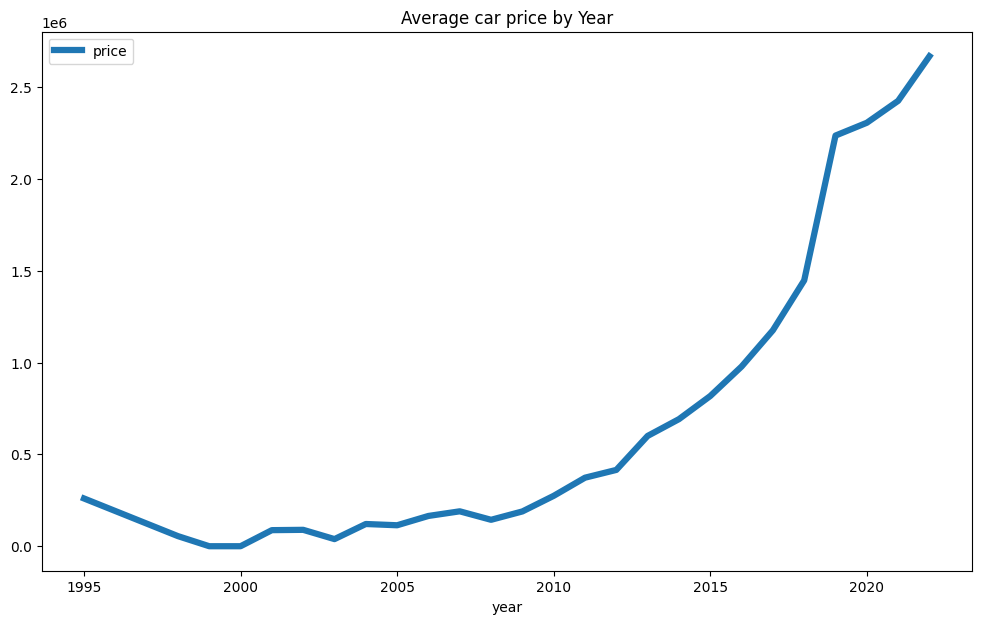

In [231]:
vis_1=pd.pivot_table(df, index=['year'],values = ['price'],aggfunc = 'mean')
vis_1.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by Year')

<Axes: title={'center': 'Average car price by kilometers driven'}, xlabel='kms_driven'>

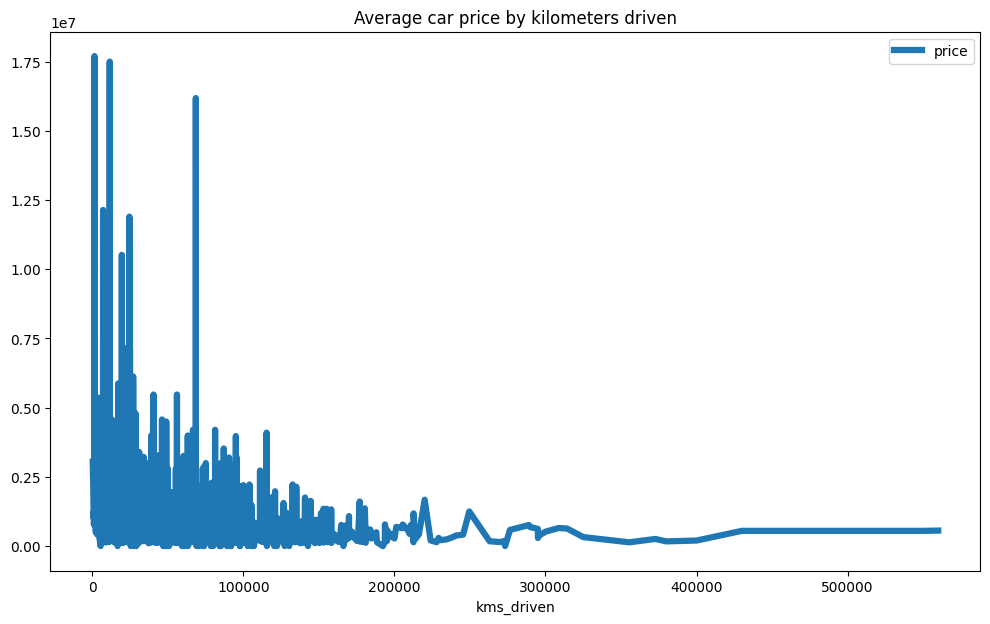

In [232]:
vis_2=pd.pivot_table(df, index=['kms_driven'],values = ['price'],aggfunc = 'mean')
vis_2.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by kilometers driven')

<Axes: title={'center': 'Average car price by number of owners'}, xlabel='ownership'>

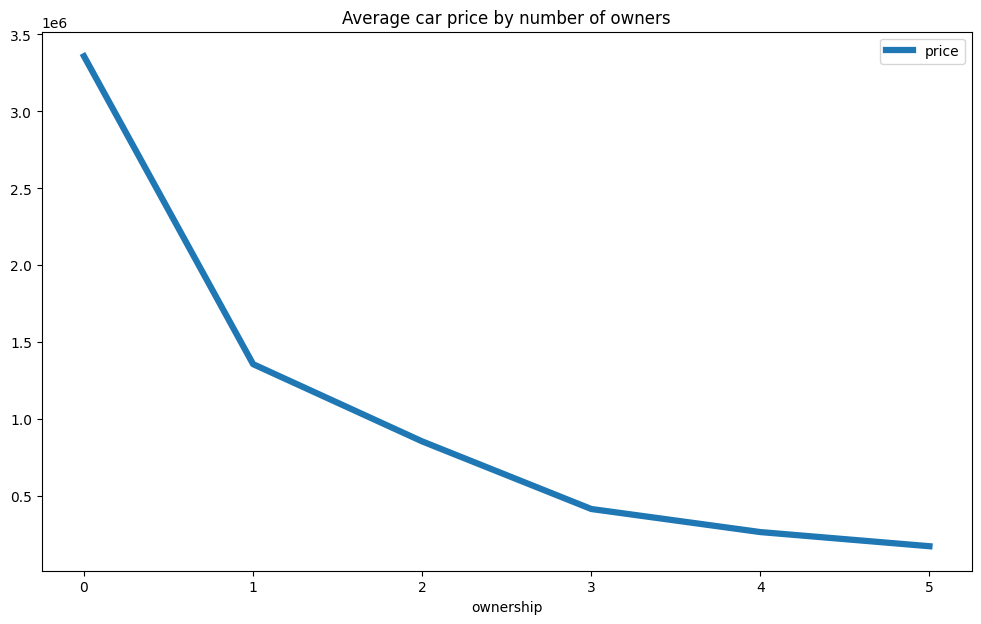

In [233]:
vis_3=pd.pivot_table(df, index=['ownership'],values = ['price'],aggfunc = 'mean')
vis_3.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by number of owners')

Text(0.5, 1.0, 'Correlation Graph')

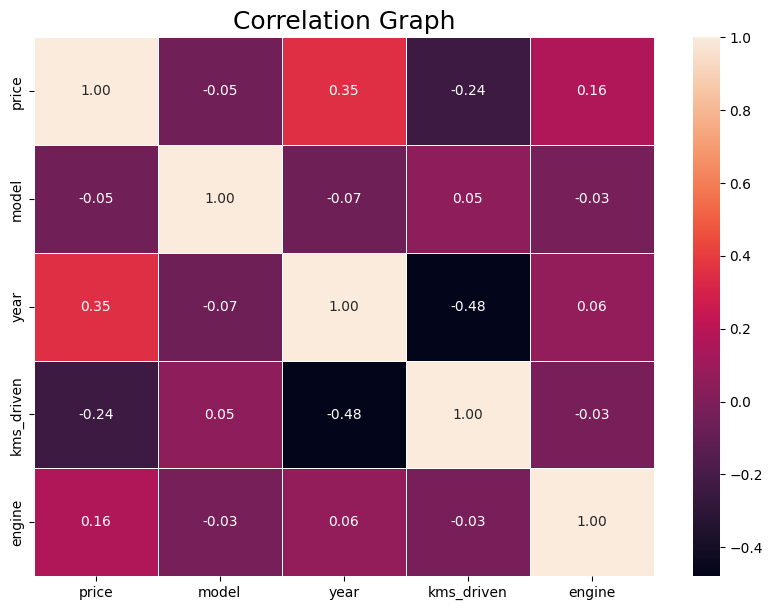

In [234]:
plt.figure(figsize=(10,7))
sns.heatmap(df[["price","model","year","kms_driven","engine"]].corr(), annot=True,linewidths=.5,fmt='.2f')
plt.title("Correlation Graph",size=18)

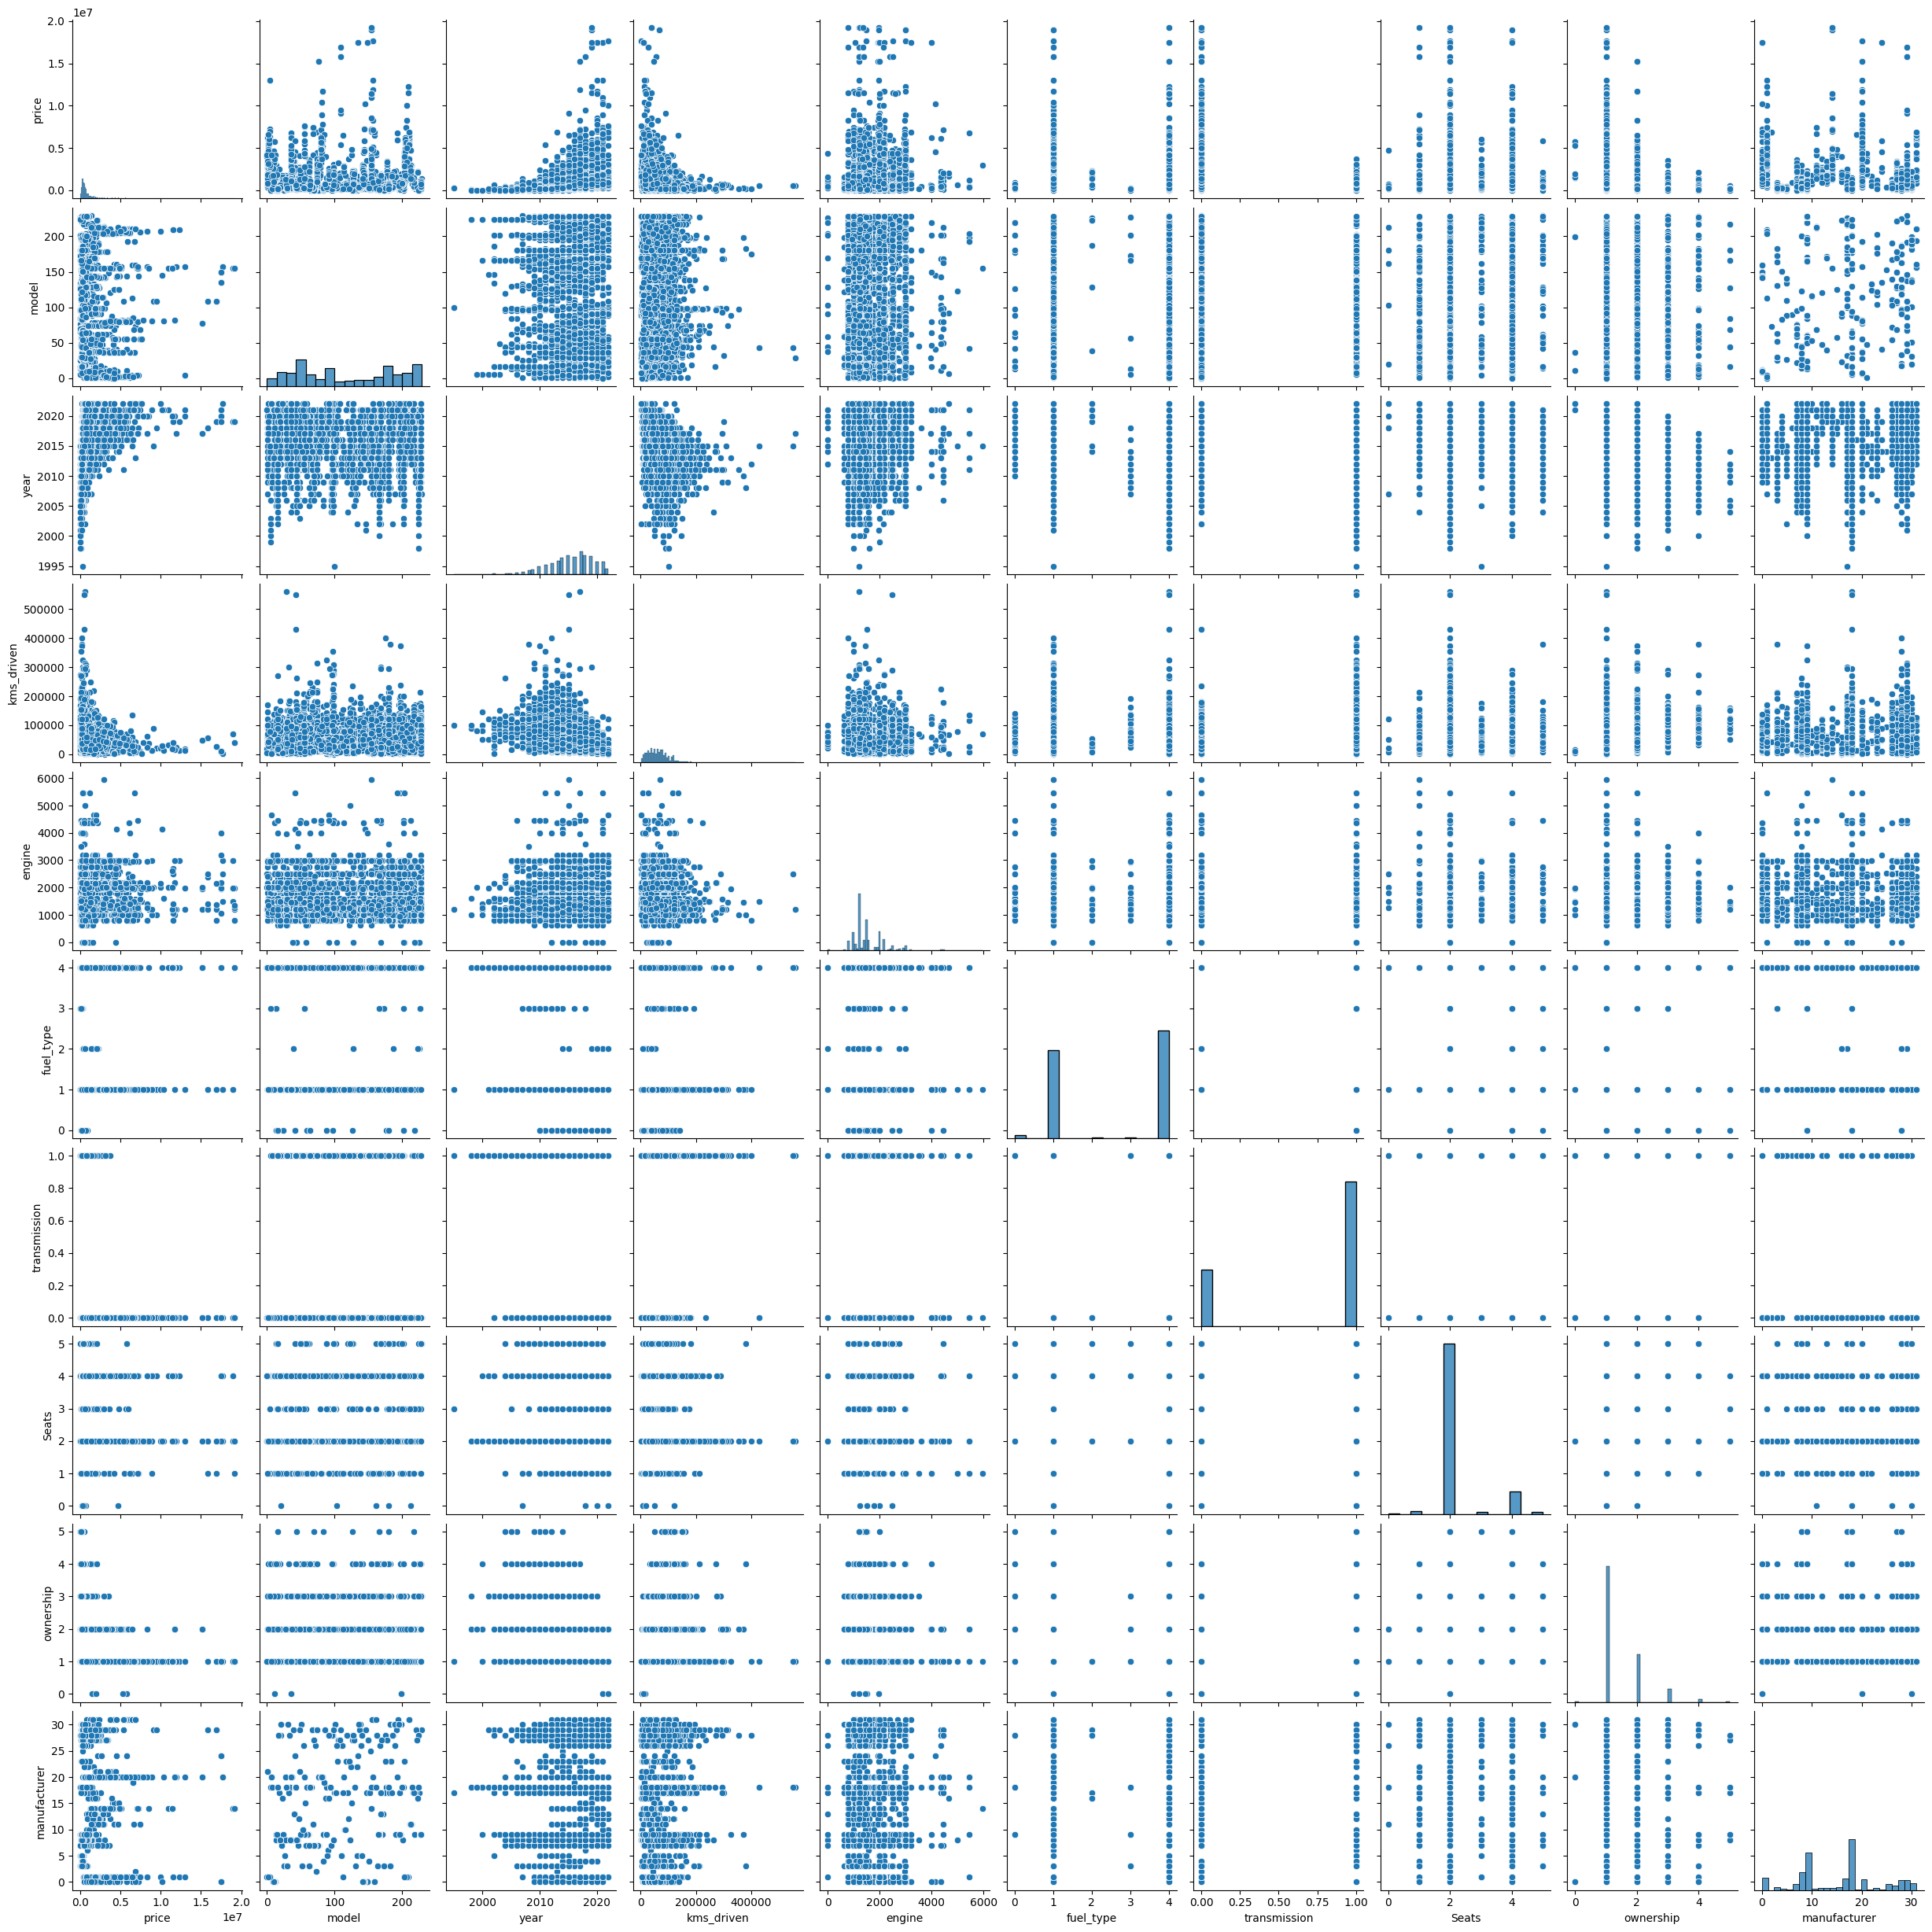

In [235]:
# pairplot
sns.pairplot(df)

In [236]:
x=df.drop('price',axis=1)
y=df['price']
print('Shape of x=',x.shape)
print('Shape of y=',y.shape)

Shape of x= (5512, 9)
Shape of y= (5512,)


In [237]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)
print("shape of x_train",x_train.shape)
print("shape of y_train ",y_train.shape)
print("shape of x_test ",x_test.shape)
print("shape of y_test ",y_test.shape)

shape of x_train (4409, 9)
shape of y_train  (4409,)
shape of x_test  (1103, 9)
shape of y_test  (1103,)


# Linear Regression

In [238]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.3286490291813917

In [239]:
from sklearn.linear_model import Ridge, Lasso

In [240]:
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_test,y_test)

0.32863012667719194

In [241]:
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_test,y_test)

0.3286490122593424

rd2=Ridge(alpha=2)
rd2.fit(x_train,y_train)
rd2.score(x_test,y_test)

In [242]:
ls2=Lasso(alpha=2)
ls2.fit(x_train,y_train)
ls2.score(x_test,y_test)

0.3286489953202497

In [243]:
ls2=Lasso(alpha=3)
ls2.fit(x_train,y_train)
ls2.score(x_test,y_test)

0.3286489783769272

In [244]:
ls3=Lasso(alpha=3)
ls3.fit(x_train,y_train)
ls3.score(x_test,y_test)

0.3286489783769272

# Random Forest Regression

In [245]:
from sklearn.ensemble import RandomForestRegressor

In [246]:
rf = RandomForestRegressor(n_estimators=100,criterion = 'squared_error')

In [247]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [248]:
rf.score(x_test,y_test)

0.9003490617642864

In [249]:
from sklearn.model_selection import cross_val_score

# Evaluation Metrics

In [250]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [251]:
y_pred=rf.predict(x_test)

In [252]:
y_test.values

array([ 675000., 5650000.,  489000., ...,  900000.,  840000.,  533000.])

In [253]:
print("Mean Absolute Error = ",mean_absolute_error(y_test,y_pred))

Mean Absolute Error =  230238.02130553036


In [254]:
print("Mean Squared Error",mean_squared_error(y_test,y_pred))

Mean Squared Error 436964018217.48956


In [255]:
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error 661032.5394543672


In [256]:
print("R2 Score = ",r2_score(y_test,y_pred))

R2 Score =  0.9003490617642864


# Decision Tree Regression

In [257]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=40,criterion='squared_error')

In [258]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=40)

In [259]:
regressor.score(x_test,y_test)

0.714780278494844

# Evaluation Metrics

In [260]:
y_pred1=regressor.predict(x_test)

In [261]:
y_test.values

array([ 675000., 5650000.,  489000., ...,  900000.,  840000.,  533000.])

In [262]:
print("Mean Absolute Error = ",mean_absolute_error(y_test,y_pred1))

Mean Absolute Error =  268568.44968268357


In [263]:
print("Mean Squared Error",mean_squared_error(y_test,y_pred1))

Mean Squared Error 1250673177697.1895


In [264]:
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred1)))

Root Mean Squared Error 1118335.0024465788


In [265]:
print("R2 Score = ",r2_score(y_test,y_pred1))

R2 Score =  0.714780278494844


# Multi Linear Regression

In [266]:
from sklearn.linear_model import LinearRegression

In [267]:
lr = LinearRegression()

In [268]:
lr.fit(x_train,y_train)

LinearRegression()

In [269]:
lr.score(x_test,y_test)

0.3286490291813917

# K-NN Algorithm

In [270]:
from sklearn.neighbors import KNeighborsRegressor

In [271]:
regressor1=KNeighborsRegressor(n_neighbors=5)
regressor1.fit(x_train,y_train)

KNeighborsRegressor()

In [272]:
regressor1.score(x_test,y_test)

0.11120631922760416

In [273]:
x_test.iloc[-2,:]

model             29
year            2021
kms_driven      3731
engine          1493
fuel_type          4
transmission       1
Seats              3
ownership          1
manufacturer      18
Name: 862, dtype: int64

In [274]:
regressor1.predict([x_test.iloc[-1,:]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([764200.])

In [275]:
y_test.iloc[-1]

533000.0

In [276]:
y_pred2=regressor.predict(x_test)
y_pred2

array([ 725000., 5650000.,  492000., ...,  900000.,  980000.,  533000.])

In [277]:
y_test

145      675000.0
5490    5650000.0
3405     489000.0
908     2150000.0
3985     980000.0
          ...    
2524    1699000.0
3424     906000.0
95       900000.0
862      840000.0
1388     533000.0
Name: price, Length: 1103, dtype: float64

In [278]:
from sklearn.model_selection import cross_val_score

In [279]:
rf_cv_scores = cross_val_score(RandomForestRegressor(n_estimators=5),x_train,y_train,cv=3)
print("Random Forest Cross Validation Scores:", rf_cv_scores)
print("Random Forest Average Cross Validation Score:", rf_cv_scores.mean())

Random Forest Cross Validation Scores: [0.6890492  0.82916082 0.79634612]
Random Forest Average Cross Validation Score: 0.7715187163500716


In [280]:
dt_cv_scores = cross_val_score(DecisionTreeRegressor(criterion='squared_error'),x_train,y_train,cv=2)
print("Decision Tree Cross Validation Scores:", dt_cv_scores)
print("Decision Tree Average Cross Validation Score:", dt_cv_scores.mean())


Decision Tree Cross Validation Scores: [0.61015375 0.5147863 ]
Decision Tree Average Cross Validation Score: 0.5624700252444605
